In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import urllib.request

In [2]:
# counrty data from johns hopkins
url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
urllib.request.urlretrieve(url, '/Users/pauldesalvo/Documents/notebooks/covid_datasets/time_series_covid19_confirmed_global.csv')

('/Users/pauldesalvo/Documents/notebooks/covid_datasets/time_series_covid19_confirmed_global.csv',
 <http.client.HTTPMessage at 0x7fc3c23a7e50>)

In [3]:
#state data from new york times
url_states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
urllib.request.urlretrieve(url_states, '/Users/pauldesalvo/Documents/notebooks/covid_datasets/us-states.csv')

('/Users/pauldesalvo/Documents/notebooks/covid_datasets/us-states.csv',
 <http.client.HTTPMessage at 0x7fc3c23bedd0>)

In [4]:
countries_df = pd.read_csv('covid_datasets/time_series_covid19_confirmed_global.csv')

In [5]:
states_df = pd.read_csv('covid_datasets/us-states.csv')

In [ ]:
pd.set_option('display.max_rows', 500)

In [68]:
countries_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,346,346,386,386,396,458,462,506,525,541
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,68,70,70,70,73,74,74,74,74,74
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,77815,80447,83426,87030,90693,94060,97509,100166,103265,106910
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,28606,28936,29285,29820,30346,30903,31392,31969,32151,32490
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,108,108,111,112,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3429,3433,3440,3453,3467,3474,3478,3492,3505,3517


In [43]:
date_column = list(countries_df.columns)[4:]

In [28]:
pd.set_option('display.max_rows', 500)

countries_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
2/17/20             int64
2/18/20             int64
2/19/20             int64
2/20/20             int64
2/21/20             int64
2/22/20             int64
2/23/20             int64
2/24/20             int64
2/25/20     

In [63]:
diff_df = countries_df.iloc[:,4:].diff(axis=1)

In [64]:
countries_only_df = countries_df.iloc[:,:4]

In [ ]:
#.sort_values(by=countries_df.columns[-1], ascending=False)

In [65]:
result = pd.concat([countries_only_df,diff_df], axis = 1, join = 'inner')

In [76]:
country_new_daily_cases = result.sort_values(by=result.columns[-1], ascending = False)

In [77]:
top_20_countries = country_new_daily_cases[:20]

In [116]:
df_new = pd.melt(frame=top_20_countries, id_vars=['Country/Region','Lat','Long'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [117]:
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m/%d/%y') 

In [118]:
df_new.head(5000)

,Country/Region,Lat,Long,Date,Number of Cases
0,US,40.000000,-100.000000,2020-01-22,NaN
1,Brazil,-14.235000,-51.925300,2020-01-22,NaN
2,India,20.593684,78.962880,2020-01-22,NaN
3,South Africa,-30.559500,22.937500,2020-01-22,NaN
4,Mexico,23.634500,-102.552800,2020-01-22,NaN
...,...,...,...,...,...
3495,Kazakhstan,48.019600,66.923700,2020-07-14,1759.0
3496,Israel,31.046051,34.851612,2020-07-14,1728.0
3497,Bolivia,-16.290200,-63.588700,2020-07-14,1617.0
3498,Indonesia,-0.789300,113.921300,2020-07-14,1591.0


In [119]:
df_new['Date'].max()

Timestamp('2020-07-14 00:00:00')

In [120]:
#total_cases_by_country = (df_new[df_new.Date == df_new.Date.max()].sort_values('Number of Cases', ascending = False)) 

In [121]:
#total_cases_by_country.reset_index()

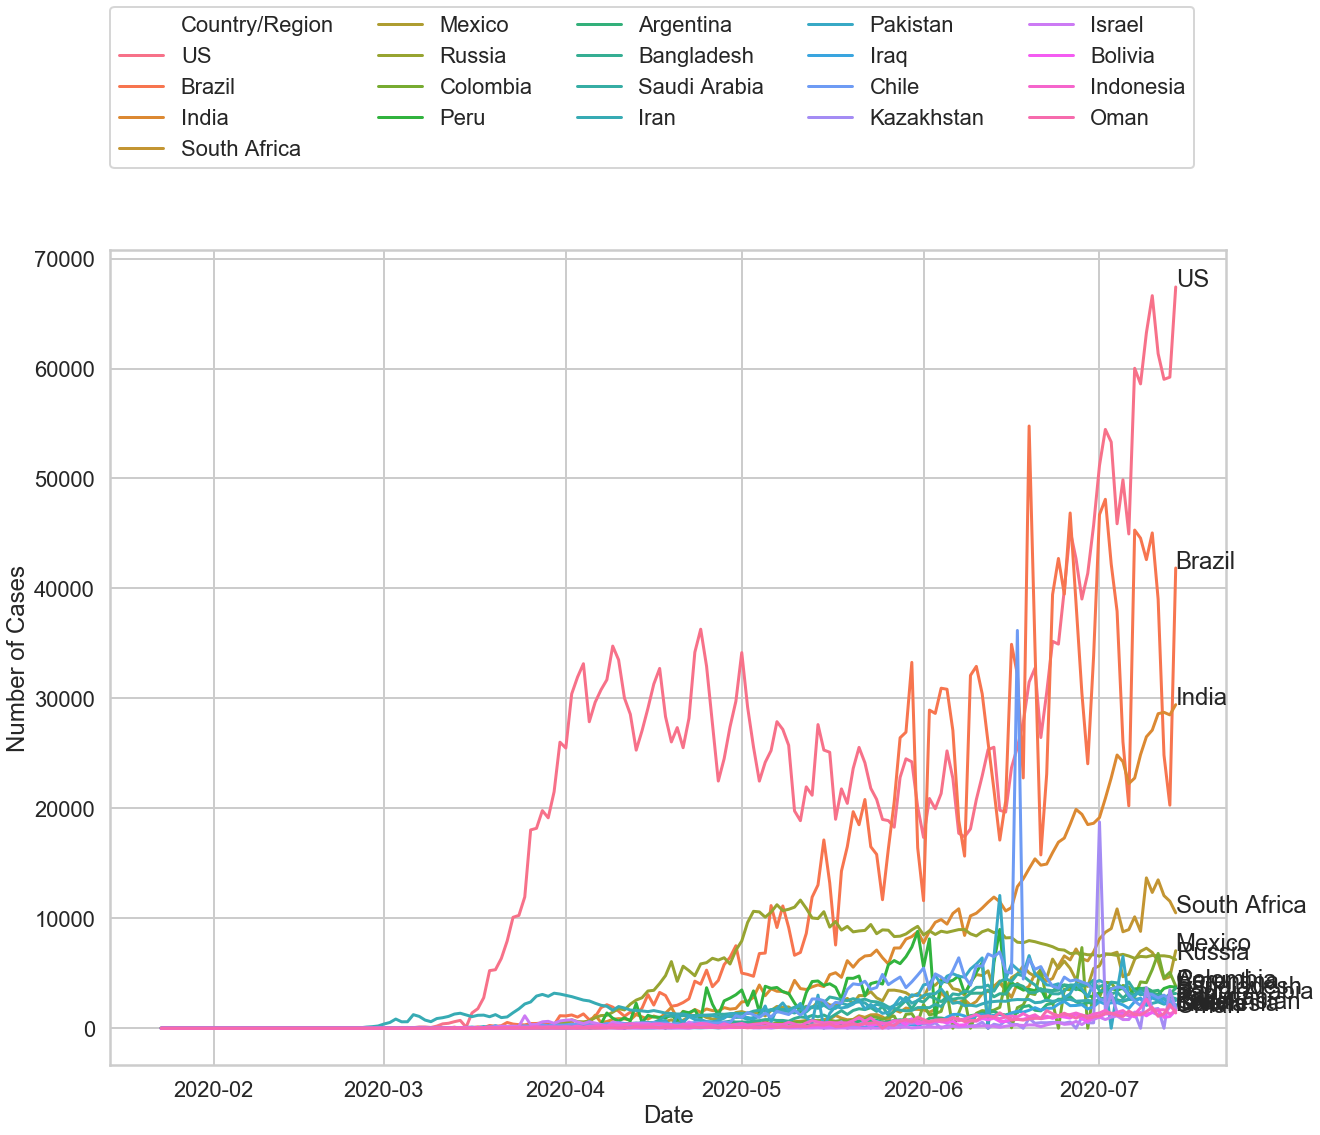

In [122]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = df_new, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = df_new[df_new.Date == df_new.Date.max()]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

plt.show()

In [125]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.shadedrelief()
plt.show()

KeyError: 'PROJ_LIB'